In [1]:
from keras.models import load_model
from sklearn import datasets
import pandas as pd
dataset = pd.read_csv('data.csv')

Using TensorFlow backend.


In [2]:
dataset.shape
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
from numpy.random import RandomState

rng = RandomState()

train = dataset.sample(frac=0.7, random_state=rng)
test = dataset.loc[~dataset.index.isin(train.index)]

In [4]:
train_label = train.iloc[:,-1]
test_label = test.iloc[:,-1]

In [5]:
train = train.drop(['y'], axis=1)
test = test.drop(['y'], axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_label)
encoded_train = encoder.transform(train_label)
print(encoded_train)

encoder = LabelEncoder()
encoder.fit(test_label)
encoded_test = encoder.transform(test_label)
print(encoded_test)

[0 3 3 ... 4 1 4]
[4 0 2 ... 2 1 2]


In [7]:
from keras.utils import to_categorical
Y_train = to_categorical(encoded_train)
Y_test = to_categorical(encoded_test)

In [8]:
print(train)

      Unnamed: 0   X1   X2   X3   X4  X5  X6   X7   X8   X9  ...  X169  X170  \
5475  X10.V1.154   19   18   17   19  17  20   20   17   12  ...  -135  -135   
5285   X1.V1.521   72  103  102   74  29 -29  -73 -118 -155  ...   -80   -34   
6671  X18.V1.331 -175 -148 -104  -52 -17  11   38   69   95  ...     3   -38   
2995  X10.V1.974  327  354  301  188  45 -51 -128 -263 -392  ...   -17  -148   
2730  X21.V1.824 -261 -252 -209 -152 -98 -52  -17    3   14  ...    22    33   
...          ...  ...  ...  ...  ...  ..  ..  ...  ...  ...  ...   ...   ...   
4251  X15.V1.792 -138 -133 -110  -81 -62 -56  -57  -54  -54  ...   -73   -91   
1801  X23.V1.363   16   28   37   35  13 -20  -54  -62  -40  ...    19    26   
3749   X10.V1.62   28   21    5    0  -8 -10   -7    0   -7  ...   -46   -25   
1441   X8.V1.343   -3   -4   -4  -10  -9 -11  -11  -13  -11  ...   -11   -18   
9952   X18.V1.87   51   46   37   12 -15 -27  -38  -40  -44  ...    -1     7   

      X171  X172  X173  X174  X175  X17

In [9]:
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [10]:
x_val = train[:1000]
partial_x_train = train[1000:]
y_val = Y_train[:1000]
partial_y_train = Y_train[1000:]

In [11]:
print(partial_x_train.shape)

(7050, 178)


In [12]:
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(300,activation = 'relu',input_shape = (178,)))
    #model.add(layers.Dropout(0.15))
    model.add(layers.Dense(100,activation='relu'))
    #model.add(layers.Dropout(0.15))
    model.add(layers.Dense(50,activation='relu'))
    #model.add(layers.Dropout(0.15))
    model.add(layers.Dense(20,activation='relu'))
    #model.add(layers.Dropout(0.15))
    model.add(layers.Dense(5,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc',tf.keras.metrics.SpecificityAtSensitivity(0.7),tf.keras.metrics.SensitivityAtSpecificity(0.7)])
    return model

In [13]:
model = build_model()
history = model.fit(partial_x_train,partial_y_train,epochs = 150,batch_size = 512, validation_data = (x_val,y_val))
model.save("MLP1.h5")

Train on 7050 samples, validate on 1000 samples
Epoch 1/150
7050/7050 [==============================] - 0s 38us/step - loss: 2.0604 - acc: 0.6801 - specificity_at_sensitivity: 0.3757 - sensitivity_at_specificity: 0.3211 - val_loss: 0.6422 - val_acc: 0.7662 - val_specificity_at_sensitivity: 0.3715 - val_sensitivity_at_specificity: 0.3714
Epoch 2/150
7050/7050 [==============================] - 0s 14us/step - loss: 0.6229 - acc: 0.7834 - specificity_at_sensitivity: 0.3749 - sensitivity_at_specificity: 0.3579 - val_loss: 0.6075 - val_acc: 0.7880 - val_specificity_at_sensitivity: 0.3795 - val_sensitivity_at_specificity: 0.3136
Epoch 3/150
7050/7050 [==============================] - 0s 14us/step - loss: 0.5969 - acc: 0.7856 - specificity_at_sensitivity: 0.3823 - sensitivity_at_specificity: 0.3640 - val_loss: 0.5970 - val_acc: 0.7772 - val_specificity_at_sensitivity: 0.3836 - val_sensitivity_at_specificity: 0.4764
Epoch 4/150
7050/7050 [==============================] - 0s 14us/step - loss

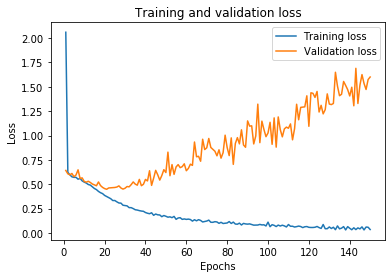

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
result =model.evaluate(test,Y_test)
print(result)

3450/3450 [==============================] - 0s 23us/step
[1.7719581879740176, 0.8323478102684021, 0.9655757546424866, 0.9691815972328186]
